우선은 100명의 학생의 데이터를 넣을거예요
근데 그 학생들의 각각의 좋아하는 유형이나 학년이나 그 데이터를 총집합한채 넣을겁니다.
그 다음 그 데이터에 따라 강의들도 선택할거고 그 선택한 강의도 데이터에 집어넣을거에요.
그 다음 그걸 통해서 예측을 하는 거죠

협업 필터링 모델에는 두 가지가 있습니다

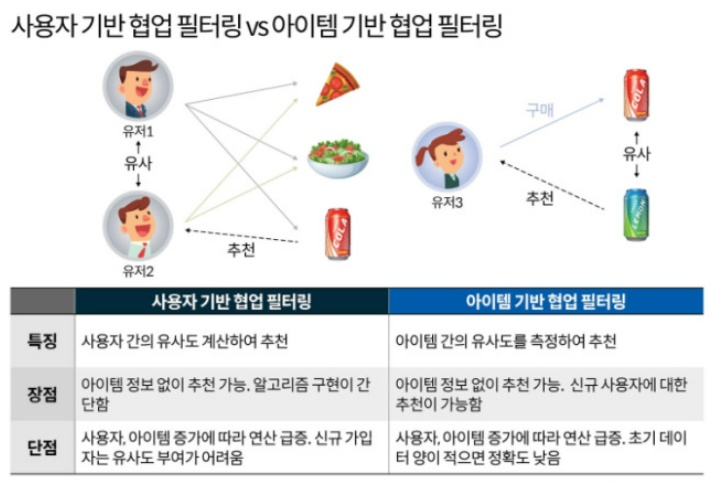

사용자 기반 협업 필터링과
아이템 기반 협업 필터링.

사용자 기반 협업 필터링을 설명해보자면
예를 들어 A, B, C 학생은 팀플강의를 너무나도 싫어하는 타입의 성격입니다.
그리고 문제해결기법 이라는 강의는 팀플강의에요. A,B,C 학생은 이 강의를 듣고 최악의 평점을 주는 겁니다. 그리고 그 팀플강의를 싫어하는 학생은 문제해결기법이라는 강의가 맞지 않았다. 라는 그 데이터를 이용해 팀플강의를 싫어하는 D학생에게는 문제해결기법이라는 강의를 추천해주지 않는 겁니다.

두 번째는 아이템 기반 협업 필터링입니다. 이는 강의간의 유사도를 측정합니다. 수많은 강의들의 데이터가 쌓여있으면 강의들간 배우는 내용이 유사하거나 과제를 내주지 않는다거나 이런 특징들이 겹칠 수가 있겠죠. 이를 통해
A가 데이터과학을 위한 프로그래밍이라는 과목을 흥미있게 들었을경우 그와 관련된 다른 과목들을 추천해주는 시스템입니다.

협업 필터링 방법으로서 코사인 유사도를 사용합니다.


우선 트리니티의 데이터를 샘플링을 하여 강의 데이터를 가져옵니다 모든 수업의 데이터를 가져와서 하고싶지만 우선은 방향성을 보다 쉽게 보여주고자 컴공 수업만 가져왔습니다. 에브리타임에서 데이터 가져왔습니다. 비어있는 부분은 강의평이 존재하지 않는 수업들입니다.
hw: 과제 1: 없음 0: 보통 -1: 많음

team: 팀플 1: 없음 0: 보통 -1: 많음

mark: 채점기준 1: 너그러움 0: 보통 -1: 깐깐함

att: 출결 반영x : 2 전자출결 : 1 복합적 : 0 지정좌석 : -1 직접호명 : -2

test: 시험횟수 없음 : 2 한번 : 1 두번 : 0 세번 : -1 네 번이상: -2
그리고 lecture_data.csv에 데이터를 저장해놓읍시다

In [ ]:
import pandas as pd

# 엑셀 파일 경로
excel_file_path = "/content/drive/MyDrive/에타 팀플,과제 등 평가.xlsx"

# 데이터 프레임 생성
lectures = pd.read_excel(excel_file_path)

if lectures.empty:
    print("No valid data to display.")
else:
    # 교과목명과 해당 파일의 점수 칼럼 추출
    selected_columns = ['교과목명', '과제', '팀플', '채점기준', '출결', '시험횟수']
    selected_lectures = lectures[selected_columns]

    # Drop rows with all NaN values in '과제', '팀플', '채점기준', '출결', '시험횟수' columns
    selected_lectures = selected_lectures.dropna(subset=['과제', '팀플', '채점기준', '출결', '시험횟수'], how='all')

    # Replace NaN values with empty string
    selected_lectures = selected_lectures.fillna('')

    # 출력 결과를 코랩에 표시
    print(selected_lectures)

    # Save the DataFrame to a CSV file
    selected_lectures.to_csv("lecture_data.csv", index=False)

print("Complete")


                 교과목명   과제   팀플  채점기준   출결  시험횟수
0        사이버스페이스의정보윤리  0.0  0.0   1.0  1.0   0.0
1        사이버스페이스의정보윤리  0.0  0.0   1.0  1.0   0.0
3             코딩과알고리즘  0.0  1.0   0.0  1.0   0.0
5          컴퓨터와프로그래밍2  0.0  1.0   0.0  1.0   0.0
6          컴퓨터와프로그래밍2 -1.0  1.0   0.0  0.0   0.0
7          컴퓨터와프로그래밍2  0.0  1.0   1.0  1.0   0.0
8         객체지향프로그래밍설계  0.0  1.0   1.0  1.0   0.0
11             데이터마이닝  0.0  0.0   1.0 -2.0   0.0
12           데이터베이스설계 -1.0  1.0   0.0 -2.0   0.0
13           데이터베이스설계 -1.0  1.0   0.0 -2.0   0.0
14             문제해결기법 -1.0  1.0   0.0  1.0   0.0
15         시스템소프트웨어실습  0.0  1.0   1.0  1.0   0.0
16         시스템소프트웨어실습  0.0  1.0   1.0  1.0   0.0
17               오토마타  0.0  1.0   1.0 -2.0   0.0
18             웹프로그래밍 -1.0  1.0   0.0  1.0   0.0
19               이산수학  0.0  1.0   0.0  1.0   0.0
20               이산수학  0.0  1.0   0.0  1.0   0.0
21  임베디드및모바일기술과비즈니스모델  1.0  1.0   1.0  1.0   0.0
22             자료구조기초  0.0  1.0   0.0 -2.0   0.0
25              컴퓨터구

좋아요. 이제 10명의 학생들을 만들고 그 학생들에게 각자의 성격을 부여한 후 임의로 한 명당 5개의 강의를 배정할거예요
그리고 student_data.csv파일에 데이터를 저장해줍시다

In [ ]:
import random
import pandas as pd

class Student:
    def __init__(self, name, personalities, grade, student_id):
        self.name = name
        self.personalities = personalities
        self.grade = grade
        self.student_id = student_id
        self.scores = {
            "과제": 0,
            "팀플": 0,
            "채점기준": 0,
            "출결": 0,
            "시험횟수": 0
        }

personality_attributes = {
    "성실한": {"과제": 2, "팀플": 2, "채점기준": 2, "출결": 2, "시험횟수": 2},
    "계획적인": {"과제": 2, "팀플": random.randint(0, 1), "채점기준": 0, "출결": 2, "시험횟수": random.randint(0, 2)},
    "외향적": {"과제": random.randint(-2, 2), "팀플": 2, "채점기준": random.randint(-2, 2), "출결": random.randint(1, 2), "시험횟수": 0},
    "내향적": {"과제": random.randint(-1, 0), "팀플": -2, "채점기준": random.randint(-1, 0), "출결": 1, "시험횟수": random.randint(-1, 0)},
    "인생이 귀찮은": {"과제": -2, "팀플": -2, "채점기준": -2, "출결": -2, "시험횟수": -2},
    "예민한": {"과제": random.randint(-1, 1), "팀플": -2, "채점기준": random.randint(-1, 1), "출결": random.randint(-1, 2), "시험횟수": random.randint(-1, 1)},
    "강의 다 상관없고 공강만 만들고 싶은 타입": {"과제": random.randint(-2, 2), "팀플": random.randint(-2, 2), "채점기준": random.randint(-2, 2), "출결": random.randint(-2, 2), "시험횟수": -10},
    "과제, 출결보다 시험을 중시하는 타입": {"과제": -2, "팀플": random.randint(-1, 1), "채점기준": 0, "출결": -2, "시험횟수": 5},
    "팀플을 극도로 싫어하는 타입": {"과제": random.randint(0, 2), "팀플": -5, "채점기준": random.randint(1, 2), "출결": random.randint(1, 2), "시험횟수": random.randint(1, 2)}
}

grades = [1, 2, 3, 4]
students = []

for i in range(10):
    name = f"학생{i+1}"
    personalities = random.sample(list(personality_attributes.keys()), k=random.randint(3, 4))

    while ("외향적" in personalities and "내향적" in personalities) or ("성실한" in personalities and "인생이 귀찮은" in personalities):
        personalities = random.sample(list(personality_attributes.keys()), k=random.randint(3, 4))

    grade = random.choice(grades)
    student_id = f"{grade}0{random.randint(10, 23)}{''.join(random.choices('0123456789', k=7))}"
    student = Student(name, personalities, grade, student_id)
    students.append(student)

for student in students:
    for attribute in student.scores:
        attribute_score = personality_attributes[random.choice(student.personalities)][attribute]
        student.scores[attribute] = attribute_score

    print(f"{student.name} ({', '.join(student.personalities)}, {student.grade}학년, 학번: {student.student_id}):")
    print(f"과제: {student.scores['과제']}, 팀플: {student.scores['팀플']}, 채점기준: {student.scores['채점기준']}, 출결: {student.scores['출결']}, 시험횟수: {student.scores['시험횟수']}")
    print()

# 학생 데이터에서 데이터 프레임 만들기
student_data = []
for student in students:
    student_info = {
        "이름": student.name,
        "성격": ", ".join(student.personalities),
        "학년": student.grade,
        "학번": student.student_id,
        "과제": student.scores["과제"],
        "팀플": student.scores["팀플"],
        "채점기준": student.scores["채점기준"],
        "출결": student.scores["출결"],
        "시험횟수": student.scores["시험횟수"]
    }
    student_data.append(student_info)
df = pd.DataFrame(student_data, columns=['이름', '성격', '학년', '학번', '과제', '팀플', '채점기준', '출결', '시험횟수'])

# Save the DataFrame to a CSV file
df.to_csv("student_data.csv", index=False)


학생1 (성실한, 계획적인, 외향적, 2학년, 학번: 20112603244):
과제: 2, 팀플: 0, 채점기준: 0, 출결: 2, 시험횟수: 1

학생2 (외향적, 팀플을 극도로 싫어하는 타입, 인생이 귀찮은, 3학년, 학번: 30124959087):
과제: 0, 팀플: 2, 채점기준: -2, 출결: 2, 시험횟수: 0

학생3 (과제, 출결보다 시험을 중시하는 타입, 계획적인, 인생이 귀찮은, 4학년, 학번: 40231617426):
과제: -2, 팀플: 0, 채점기준: 0, 출결: 2, 시험횟수: 1

학생4 (계획적인, 내향적, 인생이 귀찮은, 강의 다 상관없고 공강만 만들고 싶은 타입, 4학년, 학번: 40223975095):
과제: -2, 팀플: -2, 채점기준: 2, 출결: -2, 시험횟수: -2

학생5 (팀플을 극도로 싫어하는 타입, 과제, 출결보다 시험을 중시하는 타입, 내향적, 예민한, 3학년, 학번: 30144638748):
과제: -1, 팀플: -2, 채점기준: 0, 출결: -2, 시험횟수: 1

학생6 (강의 다 상관없고 공강만 만들고 싶은 타입, 성실한, 내향적, 2학년, 학번: 20236894095):
과제: -2, 팀플: 2, 채점기준: 2, 출결: 1, 시험횟수: 2

학생7 (예민한, 외향적, 성실한, 1학년, 학번: 10102273428):
과제: 2, 팀플: 2, 채점기준: 0, 출결: 2, 시험횟수: 1

학생8 (강의 다 상관없고 공강만 만들고 싶은 타입, 과제, 출결보다 시험을 중시하는 타입, 팀플을 극도로 싫어하는 타입, 2학년, 학번: 20229939206):
과제: -2, 팀플: 2, 채점기준: 2, 출결: -2, 시험횟수: 5

학생9 (예민한, 강의 다 상관없고 공강만 만들고 싶은 타입, 내향적, 2학년, 학번: 20119468683):
과제: -2, 팀플: -2, 채점기준: 2, 출결: -2, 시험횟수: -10

학생10 (계획적인, 예민한, 내향적, 과제, 출결보다 시험을 중시하는 타입, 4학년, 학번: 

이 코드는 각 학생의 과제, 팀플, 채점기준, 출결, 시험횟수 성적 데이터를 활용하여 각 학생과 강의 간의 유사도를 계산합니다.

강의 유사도는 코사인 유사도를 사용하여 강의들 간의 유사성을 계산됩니다.
코사인 유사도는 벡터 간의 유사도를 측정하는 방법 중 하나로, 두 벡터의 방향성과 크기를 고려하여 유사도를 계산합니다. 코사인 유사도의 값은 -1부터 1까지의 범위를 가지며, 값이 1에 가까울수록 두 벡터의 방향이 유사하고, 값이 0에 가까울수록 두 벡터는 직교하며, 값이 -1에 가까울수록 두 벡터의 방향이 반대라고 해석할 수 있습니다.
※코사인 유사도 = (A·B) / (||A|| * ||B||)

각 학생에게는 상위 3개의 유사한 강의를 추천합니다. 예를 들어, 학생1에게는 추천 강의 1이 "컴퓨터구조"이며, 유사 강의 1은 "임베디드및모바일기술과비즈니스모델"과 유사 강의 2는 "확률및통계"입니다. 이러한 결과를 바탕으로 학생1에게 "컴퓨터구조"를 추천하고, 이를 이유로 "컴퓨터구조"와 유사한 다른 강의들이 "임베디드및모바일기술과비즈니스모델"과 "확률및통계"라고 설명할 수 있습니다. 이러한 강의들은 학생1의 성향과 취향을 반영하며, 팀플이 많이 포함된 강의인 "문제해결기법" 또한 학생1에게 추천될 수 있습니다.

이와 같이 각 학생의 성적 데이터와 강의 간의 유사성을 고려하여 학생들에게 적합한 강의를 추천하는 프로그램은 학생들이 더 흥미롭고 효과적으로 학습할 수 있도록 도움을 줄 것입니다. 이 프로그램은 학생들의 관심사와 성향을 반영하여 개개인에게 최적화된 교육을 제공하는 데 도움이 될 것입니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 학생 데이터 불러오기
student_data = pd.read_csv('/content/student_data.csv')
student_data = student_data.set_index('이름')
student_scores = student_data[['과제', '팀플', '채점기준', '출결', '시험횟수']].fillna(0)

# 강의 데이터 불러오기
lecture_data = pd.read_csv('/content/lecture_data.csv')
lecture_data = lecture_data.set_index('교과목명')
lecture_scores = lecture_data[['과제', '팀플', '채점기준', '출결']].fillna(0)
lecture_scores['시험횟수'] = 0

# 강의 유사도 계산하기 (코사인 유사도 사용)
lecture_similarities = cosine_similarity(lecture_scores)

# 상위 N개 유사한 강의 가져오는 함수 정의
def get_top_similar_lectures(lecture, n):
    lecture_similarity = lecture_similarities[lecture_data.index == lecture]
    lecture_similarity = pd.Series(lecture_similarity[0], index=lecture_data.index)
    top_similar_lectures = lecture_similarity.nlargest(n+1)[1:]  # 자기 자신 강의는 제외
    return top_similar_lectures

# 각 학생에게 강의 추천하기
for student in student_data.index:
    student_scores = student_data.loc[student, ['과제', '팀플', '채점기준', '출결', '시험횟수']]

    # 학생과 강의 간 유사도 계산 (코사인 유사도 사용)
    student_similarity = cosine_similarity([student_scores], lecture_scores)
    student_similarity = pd.Series(student_similarity[0], index=lecture_data.index)

    # 학생 성적과 가장 유사한 강의 추천 받기
    top_lectures = student_similarity.nlargest(3)

    print(f"{student}:")
    for i, (lecture, similarity) in enumerate(top_lectures.items()):
        similar_lectures = get_top_similar_lectures(lecture, 2)
        print(f"추천 강의 {i+1}: {lecture} (유사도: {similarity:.2f})")
        for j, (similar_lecture, similar_similarity) in enumerate(similar_lectures.items()):
            print(f"  유사 강의 {j+1}: {similar_lecture} (유사도: {similar_similarity:.2f})")
    print()


학생1:
추천 강의 1: 컴퓨터구조 (유사도: 0.77)
  유사 강의 1: 임베디드및모바일기술과비즈니스모델 (유사도: 0.87)
  유사 강의 2: 확률및통계 (유사도: 0.87)
추천 강의 2: 임베디드및모바일기술과비즈니스모델 (유사도: 0.67)
  유사 강의 1: 확률및통계 (유사도: 1.00)
  유사 강의 2: 컴퓨터와프로그래밍2 (유사도: 0.87)
추천 강의 3: 컴퓨터네트워크 (유사도: 0.67)
  유사 강의 1: 사이버스페이스의정보윤리 (유사도: 0.71)
  유사 강의 2: 사이버스페이스의정보윤리 (유사도: 0.71)

학생2:
추천 강의 1: 코딩과알고리즘 (유사도: 0.82)
  유사 강의 1: 컴퓨터와프로그래밍2 (유사도: 1.00)
  유사 강의 2: 이산수학 (유사도: 1.00)
추천 강의 2: 컴퓨터와프로그래밍2 (유사도: 0.82)
  유사 강의 1: 컴퓨터와프로그래밍2 (유사도: 1.00)
  유사 강의 2: 이산수학 (유사도: 1.00)
추천 강의 3: 이산수학 (유사도: 0.82)
  유사 강의 1: 컴퓨터와프로그래밍2 (유사도: 1.00)
  유사 강의 2: 이산수학 (유사도: 1.00)

학생3:
추천 강의 1: 문제해결기법 (유사도: 0.77)
  유사 강의 1: 웹프로그래밍 (유사도: 1.00)
  유사 강의 2: 코딩과알고리즘 (유사도: 0.82)
추천 강의 2: 웹프로그래밍 (유사도: 0.77)
  유사 강의 1: 웹프로그래밍 (유사도: 1.00)
  유사 강의 2: 코딩과알고리즘 (유사도: 0.82)
추천 강의 3: 사이버스페이스의정보윤리 (유사도: 0.47)
  유사 강의 1: 사이버스페이스의정보윤리 (유사도: 1.00)
  유사 강의 2: 컴퓨터와프로그래밍2 (유사도: 0.82)

학생4:
추천 강의 1: 데이터마이닝 (유사도: 0.60)
  유사 강의 1: 오토마타 (유사도: 0.91)
  유사 강의 2: 자료구조기초 (유사도: 0.80)
추천 강의 2: 데이터베이스설계 (유사도: 0.37)
  유사 강